In [ ]:
from utils.config import *
import pandas as pd
import numpy as np
from utils import dataset as ds
from utils import emg_handler
import efcp_routine
import os
import importlib
import matplotlib.pyplot as plt

subject = 100
efcp_routine.subject_routine(subject=subject, fs_force=500, fs_emg=2148.1481, bpf=[20, 500], lpf=20, debug=0)

In [60]:
data = pd.read_csv(os.path.join(ANALYSIS_PATH, f'efcp_100.csv'))
emg = pd.read_csv(os.path.join(ANALYSIS_PATH, f'efcp_100_emg.csv'))
mov = pd.read_csv(os.path.join(ANALYSIS_PATH, f'efcp_100_mov.csv'))

/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_64957/3119616597.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


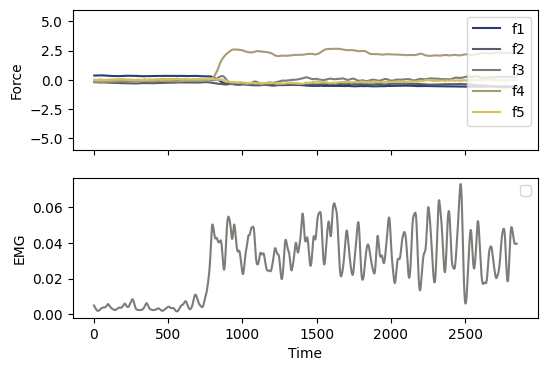

In [ ]:
from utils.config import *
import pandas as pd
import numpy as np
from utils import dataset as ds
from utils import emg_handler
import efcp_routine
import os
import importlib
import matplotlib.pyplot as plt
import seaborn as sns

BN = 1
TN = 8

mov_trial = mov[(mov['BN'])==BN & (mov['TN']==TN) & (mov['state']<4)]
emg_trial = emg[(emg['BN'])==BN & (emg['TN']==TN)]

# plot force:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 4))
colors = sns.color_palette("cividis", 5)  # Generate a list of 5 colors from the 'cividis' palette

# Plot force
sns.lineplot(data=mov_trial, x='time', y='f1', ax=ax1, label='f1', color=colors[0])
sns.lineplot(data=mov_trial, x='time', y='f2', ax=ax1, label='f2', color=colors[1])
sns.lineplot(data=mov_trial, x='time', y='f3', ax=ax1, label='f3', color=colors[2])
sns.lineplot(data=mov_trial, x='time', y='f4', ax=ax1, label='f4', color=colors[3])
sns.lineplot(data=mov_trial, x='time', y='f5', ax=ax1, label='f5', color=colors[4])
ax1.set_ylim([-6, 6])
ax1.set_ylabel('Force')
ax1.legend()

# Plot emg:
sns.lineplot(data=emg_trial, x='time', y='e5', ax=ax2, color=colors[2])
ax2.set_ylabel('EMG')
ax2.set_xlabel('Time')
ax2.legend()

plt.show()